# linear regreesion（线性回归）
注意：python版本为3.6，
安装TensorFlow的方法：pip install tensorflow

In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据并赋予列名

In [3]:
df.head()#看前五行数据，观察数据读取是否准确

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()#查看索引、数据类型和内存信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


***
# 看下原始数据

d:\software\anaconda\envs\tensorflow\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


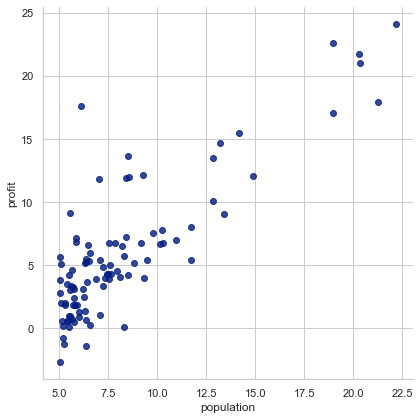

In [6]:
sns.lmplot('population', 'profit', df, size=6, fit_reg=False)#绘制散点分布图，sns.lmplot(x=column1, y=column2, data=df)，size为子图高度
plt.show()

In [7]:
def get_X(df):#读取特征

    ones = pd.DataFrame({'ones': np.ones(len(df))})#生成一个元素全为1的n维数组ones，并根据此数组生成一个m行1列的dataframe，列名为ones，dateframe名也为ones
    data = pd.concat([ones, df], axis=1)  # 将df与ones两个dataframe合并在一起，根据列合并
    return data.iloc[:, :-1].values  # 取出所有行的、除最后一列外所有列的数据，转换为数组形式返回（最后一列是y，不是特征，所以不取）


def get_y(df):#读取标签

    return np.array(df.iloc[:, -1])#取出所有行的最后一列数据，转换为数组形式返回，也就是y值


def normalize_feature(df):#特征缩放

    return df.apply(lambda column: (column - column.mean()) / column.std())
    #dataframe.apply(function,axis)对一行或一列做出一些操作（axis=1遍历行，axis=0遍历列，默认遍历列）
    #此处就是对DataFrame的每一列（column）中的进行操作，返回每一个column对应的每个值在经过lambda函数处理后得到的新值，再将这些列的新值重新组合成一个DataFrame的对象，作为整个apply方法的返回值返回
    #lambda在这里负责特征缩放，将对于每一列中的每个值，都将其设置为（（原值-该列所有取值的平均值)/该列所有取值的标准差）

多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。


In [8]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据，并赋予列名
data.head()#看下数据前5行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [9]:
X = get_X(data)#读取各样本的各特征并输出，记得提前添加了x0=1这一特征
print(X.shape, type(X))

y = get_y(data)#读取各样本的实际标签并输出
print(y.shape, type(y))#看数据维度

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [10]:
theta = np.zeros(X.shape[1])#初始化权重theta，X.shape[1]返回矩阵列数，也就是特征数2，为每个特征都设置一个权重theta，权重值初始化为1，所以这是个3*1的矩阵
print(theta)

[0. 0.]


In [11]:
def lr_cost(theta, X, y):#求出整个模型的代价函数cost

    m = X.shape[0]#m为矩阵行数，也就是训练样本数

    inner = X @ theta - y  # R(m*1)，X @ theta等价于X.dot(theta)，矩阵乘法，将X与对应的theta相乘后得出预测值，再与对应位置的实际标签值作差比较
    #矩阵运算中，m*2 @ 2*1 = m*1，m*1 - m*1 = m*1，因此inner是个m行1列的数组，inner中存的是每一个样本的预测值与真实值的偏差
    square_sum = inner.T @ inner#1*m @ m*1 = 1*1 ，相当于对所有m个样本的共m个偏差各自求平方后累加起来
    cost = square_sum / (2 * m)
    #通过以上几步最终求出整个模型的代价函数cost

    return cost

In [12]:
lr_cost(theta, X, y)#在权重为theta的情况下，计算模型的代价函数cost，并返回

32.07273387745567

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [13]:
def gradient(theta, X, y):
    m = X.shape[0]#m为矩阵行数，即样本数量

    inner = X.T @ (X @ theta - y)  # (m,2).T @ （m*2 @ 2*1 - 2*1 = m*1）-> (2, 1)，X @ theta等价于X.dot(theta)

    return inner / m#返回的是各个预测结果与实际结果的偏差的平方的和/m，也就是alpha后面的项

In [14]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):#各个特征的权重为theta，特征矩阵为x，真实结果为y，迭代次数500，学习率0.01 

    cost_data = [lr_cost(theta, X, y)]#求出整个模型的代价函数cost，设为cost_data
    _theta = theta.copy()  # 将theta复制给_theta，不和原来的theta混淆

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)#每轮都更新权重theta（theta是个向量，把他设置成向量就是为了同时更新其各个分量）
        cost_data.append(lr_cost(_theta, X, y))#用新的权重theta再次算出整个模型的代价函数cost，加入专门用于记录代价函数的列表cost_data，查看每轮迭代的效果

    return _theta, cost_data#返回迭代500次后最终得到的权重theta和代价函数列表cost_data
#批量梯度下降函数

In [15]:
epoch = 500#设置迭代次数为500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)#迭代500次后返回最终得到的权重theta和代价函数列表cost_data

In [16]:
final_theta
#输出模型中最终的权重theta

array([-2.28286727,  1.03099898])

In [17]:
cost_data_1=pd.DataFrame()
cost_data_1['epoch']=np.arange(epoch+1)#arange函数用于创建等差数组，此处为从0到epoch=500的0,1,2，...，500
cost_data_1['cost']=cost_data
cost_data_1
# 查看代价数据，观察训练效果

,epoch,cost
0,0,32.072734
1,1,6.737190
2,2,5.931594
3,3,5.901155
4,4,5.895229
...,...,...
496,496,4.717253
497,497,4.716387
498,498,4.715525
499,499,4.714666


In [18]:
# 计算最终的代价
lr_cost(final_theta, X, y)

4.7138095311168655

# visualize cost data（代价数据可视化）

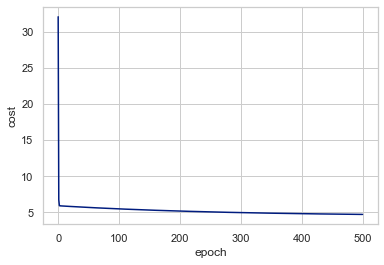

In [19]:
# ax = sns.tsplot(cost_data, time=np.arange(epoch+1))
# ax.set_xlabel('epoch')
# ax.set_ylabel('cost')
# plt.show()
# #可以看到从第二轮代价数据变换很大，接下来平稳了

ax=sns.lineplot(x='epoch',y='cost',data=cost_data_1)
plt.show()
#可以看到从第二轮代价数据变换很大，接下来平稳了


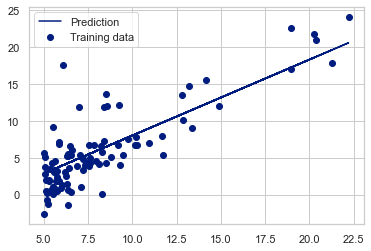

In [20]:
#观察模型拟合数据的效果
b = final_theta[0] # x0的权重，即常数项的值，在直角坐标系表示中也就是Y轴上的截距
m = final_theta[1] # x1的权重，在直角坐标系表示中也就是斜率

plt.scatter(data.population, data.profit, label="Training data")#散点图，x轴数据为data.population，y轴数据为data.profit，数据备注为Training data
plt.plot(data.population, data.population*m + b, label="Prediction")#根据x(数组或者列表)和y(数组或者列表)组成点，然后连接成线
#散点图是实际的数据，直线图是根据训练好的模型预测出的结果
plt.legend(loc=2)#loc为图例的位置，2为左上角
plt.show()

# 3- 选修章节

In [21]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 标准化数据
最简单的方法是令：

 

其中  是平均值，sn 是标准差。


In [22]:
def normalize_feature(df):#特征缩放
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [23]:
data = normalize_feature(raw_data)#raw_data中的每一列数据都进行特征缩放
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# 2. multi-var batch gradient decent（多变量批量梯度下降）

In [24]:
X = get_X(data)#读取各样本的各特征并输出，记得提前添加了x0=1这一特征，因此总特征数为2+1=3（数据集中最后一列是标签，并非特征）
print(X.shape, type(X))

y = get_y(data)#读取各样本的各标签并输出
print(y.shape, type(y))#看下数据的维度和类型

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [25]:
alpha = 0.01#学习率
theta = np.zeros(X.shape[1])#初始化权重theta，X.shape[1]返回矩阵列数，也就是特征数3，为每个特征都设置一个权重theta，权重值初始化为1，所以这是个3*1的矩阵
epoch = 500#轮数
theta

array([0., 0., 0.])

In [26]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
#各个特征的权重为theta，特征矩阵为x，真实结果为y，迭代次数500，学习率0.01 
#迭代500次后返回最终得到的权重theta和代价函数列表cost_data

In [27]:
cost_data_2=pd.DataFrame()
cost_data_2['epoch']=np.arange(epoch+1)
cost_data_2['cost']=cost_data
cost_data_2
# 查看代价数据，观察训练效果

,epoch,cost
0,0,0.489362
1,1,0.480549
2,2,0.471986
3,3,0.463665
4,4,0.455578
...,...,...
496,496,0.131996
497,497,0.131985
498,498,0.131973
499,499,0.131962


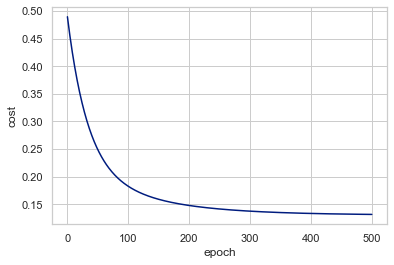

In [28]:
# sns.tsplot(time=np.arange(len(cost_data)), data = cost_data)
# plt.xlabel('epoch', fontsize=18)
# plt.ylabel('cost', fontsize=18)
# plt.show()
ax=sns.lineplot(x='epoch',y='cost',data=cost_data_2)
plt.show()


In [29]:
final_theta#输出模型中最终的权重theta

array([-1.14128565e-16,  8.30383883e-01,  8.23982853e-04])

# 3. learning rate（学习率）

In [30]:
base = np.logspace(-1, -5, num=4)#从10的-1次方到10的-5次方创建等比数列，长度是4个元素
candidate = np.sort(np.concatenate((base, base*3)))#将base这一列表与base*3这一列表连接后排序，组成新的数组
print(base)
print(base*3)
print(candidate)

[1.00000000e-01 4.64158883e-03 2.15443469e-04 1.00000000e-05]
[3.00000000e-01 1.39247665e-02 6.46330407e-04 3.00000000e-05]
[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


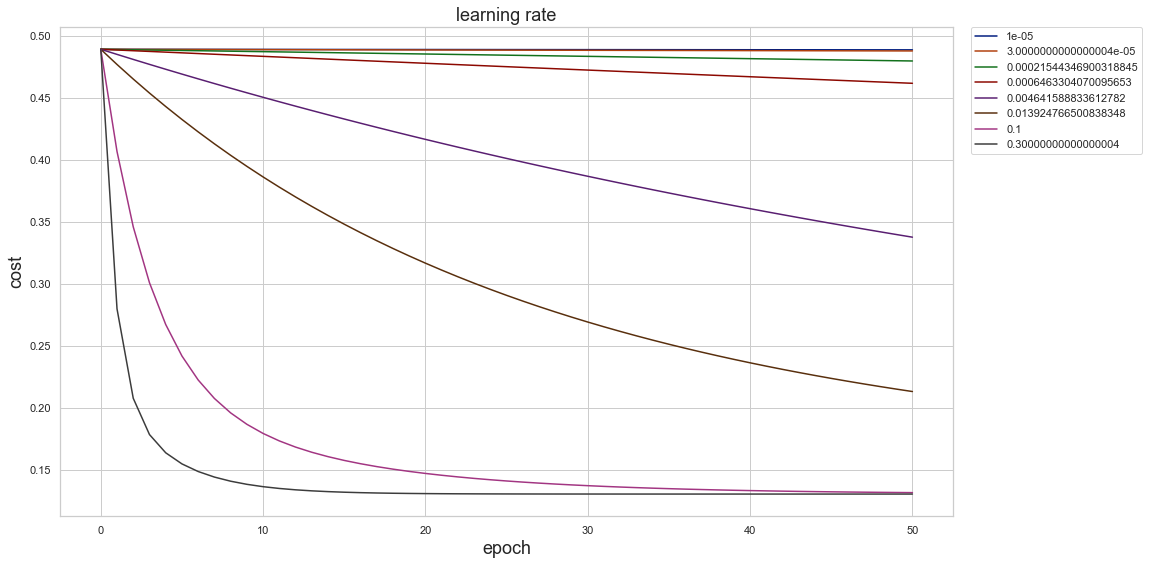

In [31]:
#观察学习率对迭代效果的影响
epoch=50#轮数为50

fig, ax = plt.subplots(figsize=(16, 9))#子图的大小为16*9

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    #迭代50次后返回最终得到的权重theta和代价函数列表cost_data
    #这里的theta没有初始化？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)#绘图，x轴数据为轮数，即50，y轴为每次的代价函数值，备注为每次的学习率

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0.)

#bbox_to_anchor表示legend的位置，前一个表示左右，后一个表示上下，1.05表示在图片右边，隔点距离，1表示与图登高，当使用这个参数时，loc将不再起正常的作用
#borderaxespad表示轴与图例边界的距离
ax.set_title('learning rate', fontsize=18)
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型



In [32]:
# 利用正规方程法一步求出权重theta矩阵
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [33]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

array([-8.67361738e-17,  8.84765988e-01, -5.31788197e-02])

# run the tensorflow graph over several optimizer，在多个优化器上运行tensorflow图

In [34]:
X_data = get_X(data)
print(X_data.shape, type(X_data))
print(X_data.shape[1], type(X_data))

y_data = get_y(data).reshape(len(X_data), 1)  #tensorflow输入数据的特殊处理
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
3 <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


In [35]:
epoch = 2000#迭代次数
alpha = 0.01#学习率

In [36]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.train.GradientDescentOptimizer):# 这个函数是旧金山的一个大神Lucas Shen写的
    # 图形输入的占位符
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)
    #数据类型常用的是tf.float32,tf.float64等，shape为数据形状。默认是None，就是一维值，也可以是多维（比如[2,3], [None, 3]表示列是3，行不定）
    # 构造图
    with tf.variable_scope('linear-regression'):#variable_scope用于管理传给get_variable()的变量名称的作用域
        #get_variable创建或返回给定名称的变量，变量名为weights，形状为X_data的列数3*1，initializer为初始化器，生成具有常量值的张量
        W = tf.get_variable("weights",
                            (X_data.shape[1], 1),
                            initializer=tf.constant_initializer())  # n*1
        
        y_pred = tf.matmul(X, W)  # 将矩阵X乘以矩阵W，生成X * W（X为各个特征值，W为各个特征值的权重，此时还是初始化的权重），m*3 @ 3*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)
        #transpose_a如果为真, 则将第一个矩阵在进行乘法计算前进行转置，此处也就是损失函数的计算公式，(m*1).T @ m*1 = 1*1，得到常数

    opt = optimizer(learning_rate=alpha)#根据参数optimizer指定次数使用的优化器的名字，而每个优化器所需要的参数只有学习率
    opt_operation = opt.minimize(loss)#建立了一个优化器，后面会用到

    # Session 是 Tensorflow 为了控制,和输出文件的执行的语句. 运行 session.run() 可以获得你要得知的运算结果, 或者是你所要运算的部分
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())#初始化所有全局变量，在构建完整个模型并在会话中加载模型后，运行这个节点。
        loss_data = []

        for i in range(epoch):#训练200次，即执行200次以下操作
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            #优化器，损失函数计算方法，3*1的权重矩阵都已经定义，在会话中，运行模型的时候通过feed_dict()函数向占位符喂入数据
            #loss_val用于计算每次迭代过程中的损失函数值，是一个1*1的矩阵（其实就是个常数）
            #W_val用于计算每次迭代后的新的权重矩阵，是一个3*1的矩阵

            loss_data.append(loss_val[0, 0])  # 在每次迭代后，都将此次的损失函数值加入loss_data中记录，[0,0]是因为损失函数是一个1*1的矩阵
            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # 在迭代出错时尽早中断函数运行
                # print('Converged at epoch {}'.format(i))
                break

    # 清空图
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val} #返回每一次迭代中的损失函数值和最后一次迭代后生成的最终权重矩阵


# Tensorflow的设计理念称之为计算流图，在编写程序时，首先构筑整个系统的graph，代码并不会直接生效，需要在实际运行时，启动一个session，
# 程序才会真正的运行。这样做的好处就是：避免反复地切换底层程序实际运行的上下文，
# tensorflow帮你优化整个系统的代码。tensorflow通过计算流图的方式，帮你优化整个session需要执行的代码，还是很有优势的。

# placeholder()函数是在神经网络构建graph的时候在模型中的占位，此时并没有把要输入的数据传入模型，它只会分配必要的内存。
# 等建立session，在会话中，运行模型的时候通过feed_dict()函数向占位符喂入数据。


In [37]:
optimizer_dict={'GD': tf.train.GradientDescentOptimizer,
                'Adagrad': tf.train.AdagradOptimizer,
                'Adam': tf.train.AdamOptimizer,
                'Ftrl': tf.train.FtrlOptimizer,
                'RMS': tf.train.RMSPropOptimizer
               }
#GradientDescentOptimizer是实现梯度下降算法的优化器。(结合理论可以看到，这个构造函数需要的一个学习率就行了)
#AdagradOptimizer是使用Adadelta算法的优化器 
#AdamOptimizer是实现了Adam算法的优化器
#FtrlOptimizer是实现了FTRL算法的优化器
#RMSPropOptimizer是实现了RMSProp算法的优化器

results = []
for name in optimizer_dict:
    res = linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])#每次都用不同的优化器训练数据，查看不同优化器的效果
    res['name'] = name
    results.append(res)
    #两列，第一列是优化器名字，第二列是优化器运行结果，而运行结果包括一堆损失函数值和一个权重矩阵

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# 画图

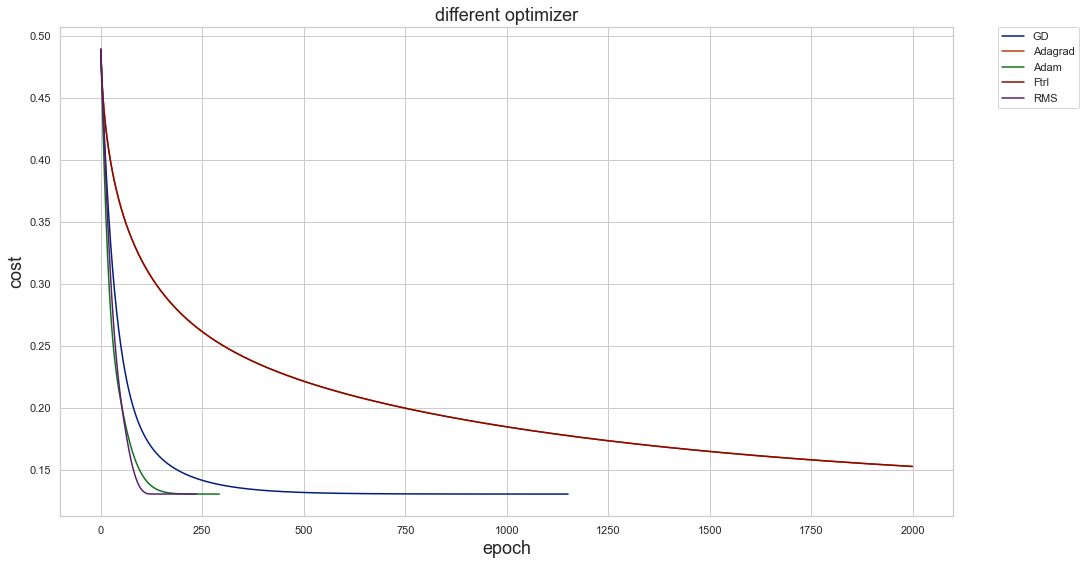

In [38]:
fig, ax = plt.subplots(figsize=(16, 9))#子图的大小为16*9

for res in results: 
    loss_data = res['loss']
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#bbox_to_anchor表示legend的位置，前一个表示左右，后一个表示上下，1.05表示在图片右边，隔点距离，1表示与图登高，当使用这个参数时，loc将不再起正常的作用
#borderaxespad表示轴与图例边界的距离
ax.set_title('different optimizer', fontsize=18)
plt.show()